In [71]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
#import seaborn as sns
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [72]:
city_df = pd.read_csv(city_data_to_load)
city_df.head()
ride_df=pd.read_csv(ride_data_to_load)
ride_df.head()
data_df = pd.merge(ride_df,city_df, on="city")
data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


## Bubble Plot of Ride Sharing Data

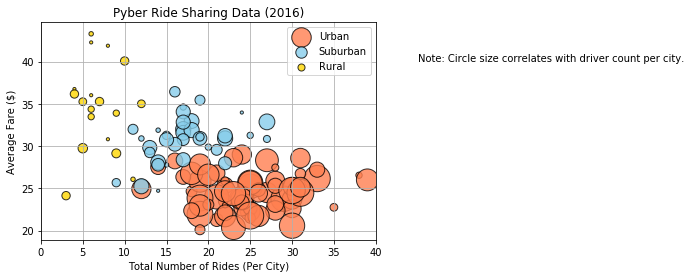

In [73]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

# In addition, you will be expected to produce the following three pie charts:

# * % of Total Fares by City Type
# * % of Total Rides by City Type
# * % of Total Drivers by City Type

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
# city_colors = {"Urban": "Black", "Suburban": "Green", "Rural": "Gold"}
# city_df['city_color'] = city_df['type'].map(lambda x: city_colors.get(x))
fare_avg = data_df.groupby("city")["fare"].mean()
fare_avg
rides_tot = data_df.groupby("city")["ride_id"].count()
rides_tot
drivers_tot = data_df.groupby("city")["driver_count"].mean()
drivers_tot
city_type = city_df.set_index('city')['type']
city_type.value_counts()



urban_cities = data_df[data_df["type"] == "Urban"]
suburban_cities = data_df[data_df["type"] == "Suburban"]
rural_cities = data_df[data_df["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]


suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]


plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")


plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0, 40)
plt.grid(True)

plt.legend(loc= "upper right")

plt.text(45, 40,"Note: Circle size correlates with driver count per city.")
plt.savefig("../pyber/scatter.png")



## Total Fares by City Type

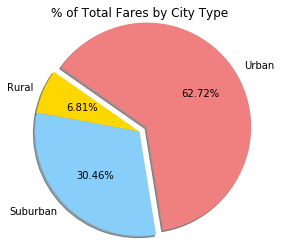

<Figure size 432x288 with 0 Axes>

In [74]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure

fare_city = data_df.groupby(["type"])["fare"].sum()
fare_city
fare_city.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(fare_city, labels = fare_city.index, autopct = "%1.2f%%", radius=1.2, center =(0,0), colors = colors, explode = explode, shadow = True, startangle = 145)
# plt.axis("equal")
plt.title('% of Total Fares by City Type', fontsize=12)
# plt.legend(loc = "upper right")
plt.show()
plt.savefig("../pyber/Fares_Pie.png")

## Total Rides by City Type

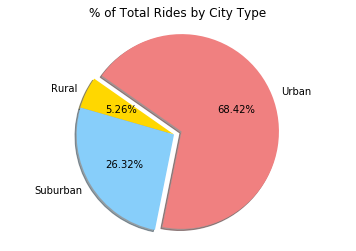

<Figure size 432x288 with 0 Axes>

In [75]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

rides_city = data_df.groupby(["type"])["ride_id"].count()
rides_city
rides_city.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(rides_city, labels = rides_city.index, autopct = "%1.2f%%", radius=1.2, center =(0,0), colors = colors, explode = explode, shadow = True, startangle = 145)

plt.axis("equal")

plt.title('% of Total Rides by City Type', fontsize=12)
# plt.legend(loc = "upper right")
plt.show()
plt.savefig("../pyber/Rides_Pie.png")



## Total Drivers by City Type

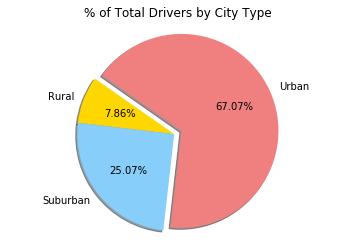

<Figure size 432x288 with 0 Axes>

In [76]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

driver_city = data_df.groupby(["type"])["driver_count"].mean()
driver_city
driver_city.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(driver_city, labels = driver_city.index, autopct = "%1.2f%%", radius=1.2, center =(0,0), colors = colors, explode = explode, shadow = True, startangle = 145)

plt.axis("equal")

plt.title('% of Total Drivers by City Type', fontsize=12)
# plt.legend(loc = "upper right")
plt.show()
plt.savefig("../pyber/Drivers_Pie.png")

In [ ]:
# Analysis
#Urban Cities have the highest number of rides
#Urban cities have the highes number of fares and drivers
#Rural has the highest number of average fare 

